In [105]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer, confusion_matrix, f1_score
import pickle


In [97]:
df = pd.read_csv("../data/nfip_claims_ML.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'basementEnclosureCrawlspace', 'condominiumIndicator',
       'policyCount', 'countyCode', 'elevatedBuildingIndicator',
       'elevationCertificateIndicator', 'floodZone', 'latitude', 'longitude',
       'locationOfContents', 'numberOfFloorsInTheInsuredBuilding',
       'nonProfitIndicator', 'obstructionType', 'occupancyType',
       'originalConstructionDate', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod', 'state',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'yearOfLoss', 'reportedZipcode', 'primaryResidence',
       'totalinsurancecoverage', 'amountPaidonTotalClaim', 'new_elev_diff',
       'floodzone_code', 'MonthOfLosss', 'BuildingsConstructionYear',
       'LossRatio', 'claim_segmentation'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Unnamed: 0,basementEnclosureCrawlspace,condominiumIndicator,policyCount,countyCode,elevatedBuildingIndicator,elevationCertificateIndicator,floodZone,latitude,longitude,locationOfContents,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,totalinsurancecoverage,amountPaidonTotalClaim,new_elev_diff,floodzone_code,MonthOfLosss,BuildingsConstructionYear,LossRatio,claim_segmentation
0,0,1,N,1,24033,0,0,X,38,-77,0,3,0,999,1,1953-01-01T00:00:00.000Z,0,0,0,0.0,7,MD,100000,40000,2007,20745,1.0,140000,0,0,X,1,1953,0.000000,0
1,1,0,N,1,30009,1,0,AE,45,-109,0,2,0,50,1,1975-01-01T00:00:00.000Z,593,0,0,0.0,1,MT,150000,0,2011,59068,1.0,150000,593,0,A,7,1975,0.003953,1
2,2,0,N,1,48201,0,3,AE,29,-95,0,2,0,10,1,1983-01-01T00:00:00.000Z,0,0,0,1.0,1,TX,25000,25000,2001,77025,1.0,50000,0,0,A,6,1983,0.000000,0
3,3,0,N,1,12103,1,0,AE,27,-82,0,2,0,10,1,1969-01-01T00:00:00.000Z,0,0,0,0.0,1,FL,150000,35000,1996,33702,1.0,185000,0,-1,A,10,1969,0.000000,0
4,4,0,N,1,24029,1,0,AE,39,-76,0,2,0,10,1,1980-01-01T00:00:00.000Z,31311,4329,0,0.0,1,MD,75000,10000,2003,21620,0.0,85000,35640,0,A,9,1980,0.419294,1


In [26]:
df.drop(["amountPaidonTotalClaim", "yearOfLoss", "originalConstructionDate", "Unnamed: 0", "floodZone", "LossRatio", "amountPaidOnBuildingClaim", "amountPaidOnContentsClaim", "amountPaidOnIncreasedCostOfComplianceClaim", "reportedZipcode", "latitude", "longitude", "countyCode"], inplace=True, axis=1)
df.claim_segmentation = [0 if x==1 else 1 for x in df.claim_segmentation]

In [9]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,basementEnclosureCrawlspace,policyCount,countyCode,elevatedBuildingIndicator,elevationCertificateIndicator,latitude,longitude,locationOfContents,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,postFIRMConstructionIndicator,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,reportedZipcode,primaryResidence,totalinsurancecoverage,amountPaidonTotalClaim,new_elev_diff,MonthOfLosss,BuildingsConstructionYear,claim_segmentation,condominiumIndicator_H,condominiumIndicator_L,condominiumIndicator_N,condominiumIndicator_Not_specified,condominiumIndicator_U,rateMethod_2,rateMethod_3,rateMethod_4,rateMethod_5,rateMethod_6,rateMethod_7,rateMethod_8,rateMethod_9,rateMethod_999,rateMethod_A,rateMethod_B,rateMethod_E,rateMethod_F,rateMethod_G,rateMethod_P,rateMethod_Q,rateMethod_R,rateMethod_RatingEngine,rateMethod_S,rateMethod_T,rateMethod_W,state_AL,state_AR,state_AS,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_GU,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_PR,state_RI,state_SC,state_SD,state_TN,state_TX,state_UN,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,floodzone_code_B,floodzone_code_C,floodzone_code_D,floodzone_code_N,floodzone_code_V,floodzone_code_X
0,1,1,24033,0,0,38,-77,0,3,0,999,1,0.0,100000,40000,20745,1.0,140000,0,0,1,1953,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,30009,1,0,45,-109,0,2,0,50,1,0.0,150000,0,59068,1.0,150000,593,0,7,1975,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,48201,0,3,29,-95,0,2,0,10,1,1.0,25000,25000,77025,1.0,50000,0,0,6,1983,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,12103,1,0,27,-82,0,2,0,10,1,0.0,150000,35000,33702,1.0,185000,0,-1,10,1969,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,24029,1,0,39,-76,0,2,0,10,1,0.0,75000,10000,21620,0.0,85000,35640,0,9,1980,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df.to_csv("../data/claims_dummied.csv", index=False)

In [24]:
df.head()

,basementEnclosureCrawlspace,condominiumIndicator,policyCount,elevatedBuildingIndicator,elevationCertificateIndicator,locationOfContents,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,postFIRMConstructionIndicator,rateMethod,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,primaryResidence,totalinsurancecoverage,amountPaidonTotalClaim,new_elev_diff,floodzone_code,MonthOfLosss,BuildingsConstructionYear,claim_segmentation
0,1,N,1,0,0,0,3,0,999,1,0.0,7,MD,100000,40000,1.0,140000,0,0,X,1,1953,1
1,0,N,1,1,0,0,2,0,50,1,0.0,1,MT,150000,0,1.0,150000,593,0,A,7,1975,0
2,0,N,1,0,3,0,2,0,10,1,1.0,1,TX,25000,25000,1.0,50000,0,0,A,6,1983,1
3,0,N,1,1,0,0,2,0,10,1,0.0,1,FL,150000,35000,1.0,185000,0,-1,A,10,1969,1
4,0,N,1,1,0,0,2,0,10,1,0.0,1,MD,75000,10000,0.0,85000,35640,0,A,9,1980,0


In [37]:
df.claim_segmentation

0          1
1          0
2          1
3          1
4          0
          ..
2337880    0
2337881    0
2337882    0
2337883    1
2337884    1
Name: claim_segmentation, Length: 2337885, dtype: int64

### In the next cell, make sure to remove the target column from the appropiate list! 

In [27]:
# create lists of features that need encoding or scaling
cat_features = list(df.select_dtypes(exclude="number").columns)
num_features = list(df.select_dtypes(include="number").columns)
num_features.remove("claim_segmentation")

In [28]:
# create a column transformer out of a scaler for the numerical and an encoder for the categorical columns 
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer([
    ("num", scaler, num_features),
    ("cat", encoder, cat_features)
])

In [29]:
# build pipe and name its components
pipe = Pipeline([
("preprocessor", preprocessor),
("clf", RandomForestClassifier(random_state=42))
])

### Remove cell/adjust target name as appropiate! 

In [30]:
# train test split
y = df.pop("claim_segmentation")
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [54]:
X_train_samp = X_train.sample(frac=0.1, random_state=42)
y_train_samp = y_train[X_train_samp.index]

In [59]:
y_train_samp.sum() / len(y_train_samp)

0.2424247608944856

In [60]:
y_train.sum() / len(y_train)

0.2406620687767229

In [56]:
X_train_samp

,basementEnclosureCrawlspace,condominiumIndicator,policyCount,elevatedBuildingIndicator,elevationCertificateIndicator,locationOfContents,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,postFIRMConstructionIndicator,rateMethod,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,primaryResidence,totalinsurancecoverage,new_elev_diff,floodzone_code,MonthOfLosss,BuildingsConstructionYear
1970212,0,N,1,0,0,3,1,0,999,1,1.0,1,LA,137500,31500,1.0,169000,-1,A,8,2000
1493679,1,N,1,0,0,2,2,0,10,2,0.0,1,MA,35000,4000,0.0,39000,0,N,1,1992
102893,2,Not_specified,1,0,0,0,3,0,999,4,0.0,999,PA,11000,0,0.0,11000,0,N,1,1992
288522,0,N,1,0,0,3,1,0,10,1,0.0,1,MS,42000,0,1.0,42000,0,C,4,1955
837079,0,N,1,0,0,3,1,0,10,1,0.0,1,FL,75000,38000,1.0,113000,0,A,10,1974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501281,0,N,1,0,0,3,1,0,10,1,0.0,1,LA,12000,5000,0.0,17000,0,A,3,1966
582740,0,N,1,0,0,0,1,0,10,1,0.0,1,IL,134500,0,1.0,134500,0,A,2,1960
1735384,0,N,1,0,0,4,2,0,999,1,1.0,7,TX,250000,100000,1.0,350000,0,X,8,2006
1032986,0,N,1,0,0,3,1,0,10,1,0.0,1,LA,6900,6100,0.0,13000,0,A,5,1960


In [57]:
y_train_samp

1970212    1
1493679    0
102893     0
288522     1
837079     0
          ..
1501281    0
582740     0
1735384    0
1032986    0
1243432    1
Name: claim_segmentation, Length: 175341, dtype: int64

In [31]:
# make fbeta scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [77]:
# define params for random search
rs_params={"clf__max_depth": list(np.arange(10, 100, step=10)) + [None],
              "clf__n_estimators": np.arange(50, 500, step=50),
              "clf__max_features": ["sqrt", "log2"],
              "clf__criterion": ["gini","entropy"],
              "clf__min_samples_leaf": np.arange(1, 10),
              "clf__min_samples_split": np.arange(2, 10, step=2)
          }

In [78]:
# define randomized search
rand = RandomizedSearchCV(pipe, rs_params, n_iter=200, scoring=["f1_weighted", "f1_micro", "accuracy"], cv=5, n_jobs=-1, random_state=42, verbose=5, refit="f1_weighted")

In [80]:
# run randomized search
rand.fit(X_train_samp, y_train_samp)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END clf__criterion=gini, clf__max_depth=None, clf__max_features=log2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100; accuracy: (test=0.760) f1_micro: (test=0.760) f1_weighted: (test=0.663) total time= 1.3min
[CV 3/5] END clf__criterion=gini, clf__max_depth=None, clf__max_features=log2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100; accuracy: (test=0.760) f1_micro: (test=0.760) f1_weighted: (test=0.663) total time= 1.3min
[CV 2/5] END clf__criterion=gini, clf__max_depth=None, clf__max_features=log2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100; accuracy: (test=0.760) f1_micro: (test=0.760) f1_weighted: (test=0.662) total time= 1.3min
[CV 5/5] END clf__criterion=gini, clf__max_depth=None, clf__max_features=log2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100; accuracy: (test=0.761) f1_micro: (test=0.761) f1_we

/Users/doro/neuefische/florita/.venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/5] END clf__criterion=gini, clf__max_depth=90, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=6, clf__n_estimators=250; accuracy: (test=0.762) f1_micro: (test=0.762) f1_weighted: (test=0.702) total time=13.9min
[CV 1/5] END clf__criterion=gini, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=450; accuracy: (test=0.760) f1_micro: (test=0.760) f1_weighted: (test=0.660) total time= 1.9min
[CV 2/5] END clf__criterion=gini, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=450; accuracy: (test=0.759) f1_micro: (test=0.759) f1_weighted: (test=0.659) total time= 1.9min
[CV 3/5] END clf__criterion=gini, clf__max_depth=10, clf__max_features=sqrt, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=450; accuracy: (test=0.760) f1_micro: (test=0.760) f1_weighted: (test=0.660) total time= 1.9min
[CV 4/5] END clf__criterion=gini

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['basementEnclosureCrawlspace',
                                                                                'policyCount',
                                                                                'elevatedBuildingIndicator',
                                                                                'elevationCertificateIndicator',
                                                                                'locationOfContents',
                                                                                'numberOfFloorsInTheInsuredBuilding',
                                                                                'n

In [81]:
# show best parameters
print("Best score:\n{:.2f}".format(rand.best_score_))
print("Best parameters:\n{}".format(rand.best_params_))

Best score:
0.70
Best parameters:
{'clf__n_estimators': 250, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_features': 'sqrt', 'clf__max_depth': 80, 'clf__criterion': 'gini'}


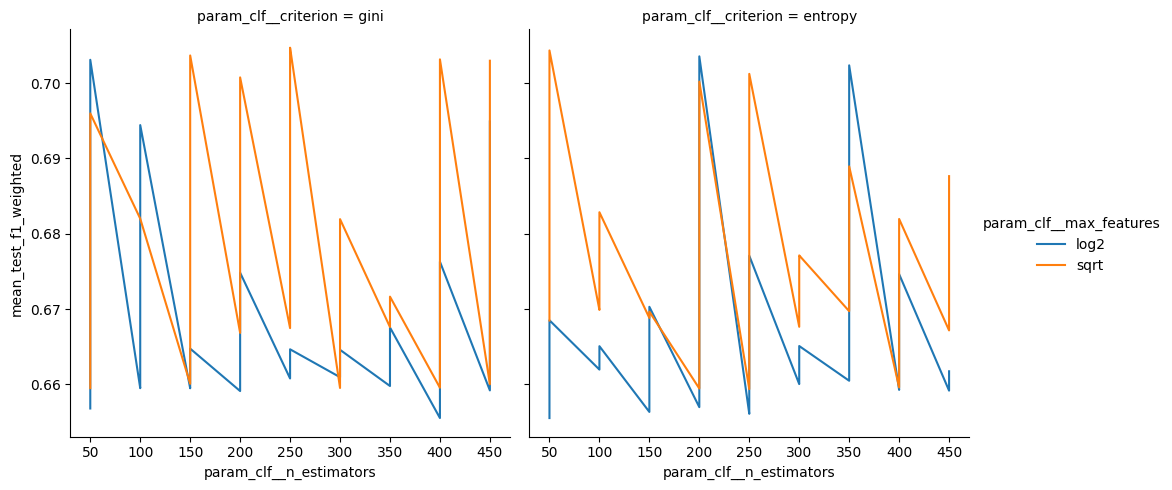

In [91]:
# create a results dataframe from the results dict of the classifier
result_df_rand = pd.DataFrame.from_dict(rand.cv_results_, orient="columns")

# plot some results, e.g.
sns.relplot(data=result_df_rand,
            kind="line",
            estimator=None,
            x="param_clf__n_estimators",
            y="mean_test_f1_weighted",
            col="param_clf__criterion",
            hue="param_clf__max_features"
            )
plt.show()

In [83]:
result_df_rand.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__n_estimators,param_clf__min_samples_split,param_clf__min_samples_leaf,param_clf__max_features,param_clf__max_depth,param_clf__criterion,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,split3_test_f1_micro,split4_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,280.287363,0.632418,3.457601,0.063221,450,8,7,log2,None,gini,"{'clf__n_estimators': 450, 'clf__min_samples_s...",0.660263,0.659705,0.660695,0.661415,0.662046,0.660825,0.000828,154,0.759788,0.759610,0.759895,0.760009,0.760152,0.759891,0.000185,147,0.759788,0.759610,0.759895,0.760009,0.760152,0.759891,0.000185,147
1,76.972931,1.736595,0.890387,0.037737,100,2,5,log2,None,gini,"{'clf__n_estimators': 100, 'clf__min_samples_s...",0.662800,0.662027,0.662960,0.662654,0.663855,0.662859,0.000590,129,0.760472,0.760066,0.760266,0.760351,0.760636,0.760358,0.000192,123,0.760472,0.760066,0.760266,0.760351,0.760636,0.760358,0.000192,123
2,89.169717,1.261217,1.768137,0.124387,400,4,9,sqrt,10,gini,"{'clf__n_estimators': 400, 'clf__min_samples_s...",0.659391,0.659037,0.659501,0.659978,0.659824,0.659546,0.000331,177,0.759588,0.759211,0.759467,0.759695,0.759496,0.759492,0.000162,173,0.759588,0.759211,0.759467,0.759695,0.759496,0.759492,0.000162,173
3,132.054168,0.732656,0.986394,0.051245,100,8,6,sqrt,None,entropy,"{'clf__n_estimators': 100, 'clf__min_samples_s...",0.674898,0.671603,0.672120,0.672400,0.671317,0.672468,0.001273,63,0.763466,0.762148,0.762034,0.762861,0.761349,0.762372,0.000728,50,0.763466,0.762148,0.762034,0.762861,0.761349,0.762372,0.000728,50
4,221.254592,1.956111,2.505077,0.170088,300,2,5,log2,40,gini,"{'clf__n_estimators': 300, 'clf__min_samples_s...",0.663026,0.662459,0.662829,0.662749,0.664153,0.663043,0.000584,124,0.760615,0.760408,0.760494,0.760437,0.760636,0.760518,0.000092,116,0.760615,0.760408,0.760494,0.760437,0.760636,0.760518,0.000092,116


In [89]:
result_df_rand.to_csv("../data/random_search_results1.csv")

In [92]:
df = pd.read_csv("../data/nfip_claims_ML.csv")
df.drop(["amountPaidonTotalClaim", "yearOfLoss", "originalConstructionDate", "Unnamed: 0", "floodZone", "LossRatio", "amountPaidOnBuildingClaim", "amountPaidOnContentsClaim", "amountPaidOnIncreasedCostOfComplianceClaim"], inplace=True, axis=1)
df.claim_segmentation = [0 if x==1 else 1 for x in df.claim_segmentation]
# create lists of features that need encoding or scaling
cat_features = list(df.select_dtypes(exclude="number").columns)
num_features = list(df.select_dtypes(include="number").columns)
num_features.remove("claim_segmentation")
# create a column transformer out of a scaler for the numerical and an encoder for the categorical columns 
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer([
    ("num", scaler, num_features),
    ("cat", encoder, cat_features)
])
# build pipe and name its components
pipe = Pipeline([
("preprocessor", preprocessor),
("clf", RandomForestClassifier(random_state=42))
])

# train test split
y = df.pop("claim_segmentation")
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
X_train_samp = X_train.sample(frac=0.1, random_state=42)
y_train_samp = y_train[X_train_samp.index]
# define params for random search
rs_params={"clf__max_depth": list(np.arange(40, 150, step=10)) + [None],
              "clf__n_estimators": np.arange(50, 500, step=50)
          }
# define randomized search
rand2 = RandomizedSearchCV(pipe, rs_params, n_iter=50, scoring=["f1_weighted", "accuracy"], cv=5, n_jobs=-1, random_state=42, verbose=5, refit="f1_weighted")
# run randomized search
rand2.fit(X_train_samp, y_train_samp)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 2/5] END clf__max_depth=50, clf__n_estimators=100; accuracy: (test=0.768) f1_weighted: (test=0.722) total time=10.7min
[CV 3/5] END clf__max_depth=50, clf__n_estimators=100; accuracy: (test=0.769) f1_weighted: (test=0.724) total time=10.7min
[CV 1/5] END clf__max_depth=50, clf__n_estimators=100; accuracy: (test=0.767) f1_weighted: (test=0.722) total time=10.7min
[CV 4/5] END clf__max_depth=50, clf__n_estimators=100; accuracy: (test=0.771) f1_weighted: (test=0.726) total time=11.8min
[CV 5/5] END clf__max_depth=50, clf__n_estimators=100; accuracy: (test=0.771) f1_weighted: (test=0.726) total time=11.8min
[CV 2/5] END clf__max_depth=120, clf__n_estimators=300; accuracy: (test=0.769) f1_weighted: (test=0.722) total time=34.5min
[CV 1/5] END clf__max_depth=120, clf__n_estimators=300; accuracy: (test=0.768) f1_weighted: (test=0.722) total time=34.5min
[CV 5/5] END clf__max_depth=120, clf__n_estimators=300; accuracy: (test=0.7

/Users/doro/neuefische/florita/.venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/5] END clf__max_depth=40, clf__n_estimators=250; accuracy: (test=0.772) f1_weighted: (test=0.725) total time=29.1min
[CV 2/5] END clf__max_depth=40, clf__n_estimators=250; accuracy: (test=0.770) f1_weighted: (test=0.723) total time=29.2min
[CV 1/5] END clf__max_depth=130, clf__n_estimators=150; accuracy: (test=0.768) f1_weighted: (test=0.722) total time=18.2min
[CV 2/5] END clf__max_depth=130, clf__n_estimators=150; accuracy: (test=0.770) f1_weighted: (test=0.724) total time=18.2min
[CV 3/5] END clf__max_depth=130, clf__n_estimators=150; accuracy: (test=0.770) f1_weighted: (test=0.724) total time=18.2min
[CV 4/5] END clf__max_depth=130, clf__n_estimators=150; accuracy: (test=0.772) f1_weighted: (test=0.726) total time=18.3min
[CV 4/5] END clf__max_depth=40, clf__n_estimators=250; accuracy: (test=0.773) f1_weighted: (test=0.726) total time=28.9min
[CV 5/5] END clf__max_depth=40, clf__n_estimators=250; accuracy: (test=0.772) f1_weighted: (test=0.726) total time=28.9min
[CV 5/5] END

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['basementEnclosureCrawlspace',
                                                                                'policyCount',
                                                                                'countyCode',
                                                                                'elevatedBuildingIndicator',
                                                                                'elevationCertificateIndicator',
                                                                                'latitude',
                                                                                'longitude',
                       

In [93]:
# show best parameters
print("Best score:\n{:.2f}".format(rand2.best_score_))
print("Best parameters:\n{}".format(rand2.best_params_))
# create a results dataframe from the results dict of the classifier
result_df_rand2 = pd.DataFrame.from_dict(rand2.cv_results_, orient="columns")

# plot some results, e.g.
sns.relplot(data=result_df_rand2,
            kind="line",
            x="param_clf__n_estimators",
            y="mean_test_f1_weighted",
            col="param_clf__criterion",
            hue="param_clf__max_features"
            )
plt.show()



Best score:
0.72
Best parameters:
{'clf__n_estimators': 400, 'clf__max_depth': 50}


ValueError: Could not interpret value `param_clf__max_features` for parameter `hue`

In [95]:
result_df_rand2.to_csv("../data/random_search_results_with_geo_RF.csv")

In [94]:
result_df_rand2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__n_estimators,param_clf__max_depth,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,2059.553397,3.950450,14.932013,2.135155,300,120,"{'clf__n_estimators': 300, 'clf__max_depth': 120}",0.722243,0.722339,0.725141,0.726495,0.726833,0.724610,0.001977,2,0.768456,0.768963,0.771159,0.772385,0.772556,0.770704,0.001706,13
1,664.578729,32.772884,3.304146,0.084113,100,50,"{'clf__n_estimators': 100, 'clf__max_depth': 50}",0.721647,0.721758,0.723748,0.725891,0.726101,0.723829,0.001922,44,0.767344,0.768165,0.769220,0.770988,0.770845,0.769312,0.001439,44
2,1727.246412,11.717236,8.422488,1.346142,250,40,"{'clf__n_estimators': 250, 'clf__max_depth': 40}",0.722371,0.722692,0.724969,0.726208,0.726011,0.724450,0.001625,26,0.769226,0.769933,0.771729,0.772613,0.771872,0.771075,0.001277,2
3,1084.423535,7.749037,5.027675,0.165764,150,130,"{'clf__n_estimators': 150, 'clf__max_depth': 130}",0.721921,0.723862,0.724229,0.726110,0.726873,0.724599,0.001749,4,0.768200,0.769762,0.770132,0.772043,0.772071,0.770442,0.001470,27
4,3114.059920,94.931126,15.598014,3.181806,450,100,"{'clf__n_estimators': 450, 'clf__max_depth': 100}",0.722632,0.722268,0.725121,0.726567,0.725870,0.724492,0.001732,17,0.768770,0.769163,0.771130,0.772556,0.772043,0.770732,0.001518,8


In [99]:
df = pd.read_csv("../data/nfip_claims_ML.csv")
df.drop(["amountPaidonTotalClaim", "yearOfLoss", "originalConstructionDate", "Unnamed: 0", "floodZone", "LossRatio", "amountPaidOnBuildingClaim", "amountPaidOnContentsClaim", "amountPaidOnIncreasedCostOfComplianceClaim"], inplace=True, axis=1)
df.claim_segmentation = [0 if x==1 else 1 for x in df.claim_segmentation]

# set OneHotEncoding
cat_features = list(df.select_dtypes(exclude="number").columns)
encoder = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ("cat", encoder, cat_features)
])

# build pipe and name its components
pipe_rf = Pipeline([
("preprocessor", preprocessor),
("clf", RandomForestClassifier(random_state=42, n_estimators=400, max_depth=50))
])

# train test split
y = df.pop("claim_segmentation")
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# fit pipeline
pipe_rf.fit(X_train, y_train)



TypeError: predict() takes 2 positional arguments but 3 were given

In [101]:
# if you're ready to look at the result on the test data
pipe_rf.score(X_test, y_test)
 


0.7610954844714546

In [102]:
# save trained model
import pickle 
filename = "random_forest.pickle"
pickle.dump(pipe_rf, open(filename, "wb"))

In [104]:
# confusion matrix
y_pred = pipe_rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[440821,   2991],
       [136642,   4018]])

In [110]:
confusion_matrix(y_test, y_pred_log)

array([[439655,   4157],
       [135854,   4806]])

In [107]:
f1_score(y_test, y_pred, average="weighted")

0.6686149888140653

In [118]:
from sklearn.linear_model import LogisticRegression

# create lists of features that need encoding or scaling
cat_features = list(X.select_dtypes(exclude="number").columns)
num_features = list(X.select_dtypes(include="number").columns)
# create a column transformer out of a scaler for the numerical and an encoder for the categorical columns 
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown="ignore")

preprocessor_reg = ColumnTransformer([
    ("num", scaler, num_features),
    ("cat", encoder, cat_features)
])

pipe_log = Pipeline([
("preprocessor", preprocessor_reg),
("clf", LogisticRegression(random_state=42, max_iter=3000))
])

# fit pipeline
pipe_log.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['basementEnclosureCrawlspace',
                                                   'policyCount', 'countyCode',
                                                   'elevatedBuildingIndicator',
                                                   'elevationCertificateIndicator',
                                                   'latitude', 'longitude',
                                                   'locationOfContents',
                                                   'numberOfFloorsInTheInsuredBuilding',
                                                   'nonProfitIndicator',
                                                   'obstructionType',
                                                   'occupancyType',
                                                   'postFIR...
                                                   'to

In [120]:
y_pred_log = pipe_log.predict(X_test)

f1_score(y_test, y_pred_log, average="weighted")

0.6710935106521979

In [111]:
pipe_rf2 = Pipeline([
("preprocessor", preprocessor),
("clf", RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20))
])

# fit pipeline
pipe_rf2.fit(X_train, y_train)


0.6686149888140653

In [113]:

y_pred2 = pipe_rf2.predict(X_test)

f1_score(y_test, y_pred2, average="weighted")

0.6647736912559059

In [114]:
confusion_matrix(y_test, y_pred2)

array([[441980,   1832],
       [137916,   2744]])

In [ ]:
# define params for grid search, based on random search results
gs_params = {
               }

In [ ]:
# define grid search
grid = GridSearchCV(pipe, param_grid=gs_params, cv=5, scoring=ftwo_scorer, verbose=1, n_jobs=-1)

In [ ]:
# run grid search
grid.fit(X_train, y_train)

In [ ]:
# show best parameters
print("Best score:\n{:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

In [ ]:
# save best model
best_model = grid.best_estimator_
filename = "finalized_model.sav"
pickle.dump(best_model, open(filename, "wb"))